# import packages

In [ ]:
#imports
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import warnings
import scanpy as sc
from torch.distributions.beta import Beta

import numpy.matlib
import numpy as np 
import torch
import json
#from pyvis.network import Network
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as ds
from torch.autograd import Variable
from torch import optim
from sklearn.decomposition import NMF
from opt_einsum import contract 
#from util import s_term_normal, s_term_bernoulli
from torch.distributions.normal import Normal
from torch.distributions.log_normal import LogNormal
from torch.distributions.dirichlet import Dirichlet
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from collections import OrderedDict
import matplotlib.pyplot as plt
import warnings
import matplotlib

#spectra imports (dev version)
from pyspade_global import *
from util import *
import argparse

In [2]:
#colors and style
color_map_clusters_nogrey = ["#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]

batlow_20 = ['#1d2356','#1d2b59',
'#14375e',
'#134460',
'#1c5261',
'#235f5f',
'#396a58',
'#4c714e',
'#607843',
'#757e36',
'#8d8532',
'#a78b30',
'#c49138',
'#dc954d',
'#f09c6a',
'#f8a487',
'#f8aca2',
'#f8b5be',
'#f8c2d9',
'#eecbe1'] 
import random
random.seed(3)
random.shuffle(batlow_20)


subtype_color_dict = {'global':'#FFFFFF','TAM':'#FFFF00',
                 'DC_cDC2A':'#1CE6FF',
                 'pDC':'#FF34FF',
                 'M-MDC':'#FF4A46',
                 'mono_c':'#008941',
                 'mast':'#006FA6',
                      'TAM_TRMac':'#456D75',
                 'DC_cDC1':'#A30059',
                 'Gr-MDC':'#7A4900',
                 'DC_Langerhans':'#0000A6',
                      'DC_AXLpos_ITGAXpos':'#0CBD66',
                      'DC_FDC_PTPRCpos':'#EEC3FF',
                'DC_cDC3':'#63FFAC',
                'CD8_T':'#B79762',
                'Treg':'#004D43',
                'CD4_T':'#8FB0FF',
                'CD8_T':'#997D87',
                 'NK':'#5A0007',
                 'gdT':'#809693',
                    'ILC3':'#7900D7',
                       'CD8_T_KLRG1pos_effector_preexhausted':'#4FC601',
                 'CD4_T_naive':'#3B5DFF',
                 'CD4_T_TH1':'#4A3B53',
                 'CD8_T_TRM':'#FF2F80',
                'CD8_T_TRM_exhausted':'#61615A',
                 'CD8_T_naive':'#BA0900',
                 'CD8_T_KLRG1pos_effector_preexhausted':'#6B7900',
             'CD4_T_naive_low_libsize':'#00C2A0',
                 'CD8_T_naive':'#FFAA92',
             'NK_CD56bright':'#FF90C9',
                 'CD8_T_TEM_effector_exhausted-progenitor':'#B903AA',
            'gdT':'#D16100',
              'CD8_T_KLRG1pos_effector_nonexhausted':'#DDEFFF',
              'CD8_T_TRM_exhausted_proliferating':'#000035',
            'CD4_T_TH1_proliferating':'#7B4F4B',
               'NK_CD56dim':'#A1C299',
               'Treg':'#300018',
                  'CD8_T_KLRG1pos_effector_preexhausted':'#0AA6D8',
                         'MDC':'#013349',
                 'DC':'#00846F',
                'mixed_T_M':'#636375',
                        'B_memory':'#372101',
                
                 'B_naive':'#FFB500',
                'plasma':'#C2FFED',
                'B_GC':'#A079BF',
                    'B_memory_switched':'#CC0744',
                'plasma_IgA':'#C0B9B2',
                 'B_memory_double_neg':'#C2FF99',
               'plasma_IgG':'#001E09',
                'plasmablast':'#00489C',
               'plasma_Be1':'#6F0062',
                     'M':'#B77B68',
                     'TNK':'#7A87A1',
                     'B':'#788D66',
                     'TAM_MKlike':'#885578',
                     'mono':'#34362D',
                     'mono_c':'#B4A8BD',
                     'mono_nc':'#00A6AA',
                     'ILC1':'#452C2C',
                     'CD4_T_TFH':'#A3C8C9',
                     'CD4_T_TFH_exhausted-progenitor':'#FF913F',
                     'CD4_T_TSCM':'#938A81',
                     'CD8_T_KLRG1neg_effector_preexhausted':'#575329',
                     'CD8_T_KLRG1pos_effector_exhausted':'#00FECF',
                     'CD8_T_TRM_nonexhausted':'#B05B6F',
                     'CD8_T_innate-like':'#8CD0FF',
                     'TNK_proliferating':'#3B9700',
                     'NK_CD56dim_proliferating':'#04F757',
                     'T':'#C8A1A1',
                     'T_proliferating':'#1E6E00',
                     'B_memory':"#BC23FF",
                      'B_naive':"#A77500",
                      'plasma':"#6367A9",
                 'B_GC':"#A05837",
                      'B_memory_switched':"#6B002C",
                 'B_naive':"#772600",
              'plasma_IgA':"#D790FF",
                'B_memory_double_neg':"#9B9700",
               'plasma_IgG':"#549E79",
                 'plasmablast':"#FFF69F",
                'plasma_IgG':"#201625",
                 'plasma_Be1':"#72418F",
                      'B':"#922329", 
                      'TNK':"#99ADC0",
                      'M': "#3A2465",
                      'nan':'#000000',
                      'B_GC_proliferating':'#5B4534',
                      'B_memory_switched_Be1':'#FDE8DC',
                      'B_memory_switched_proliferating':'#404E55',
                      'plasma_IgG_Be1':'#0089A3',
                       'B_proliferating':'#CB7E98'
                }

In [7]:
fig_save_path = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/'
DATA_DIR = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/'

In [8]:
def cell_scores(out,factors):
    return out*factors.mean(axis = 1).reshape(1,-1)

In [9]:
%matplotlib inline
sns.set_style('white')
sns.set_style("ticks", {"xtick.direction": 'in', "ytick.direction": 'in'})


matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

In [10]:
#define model parameters
pseudocount = 0.0
lam = 0.01
delta = 0.001

In [11]:
#model parameters
X, adata2, word2id, id2word, labels, vocab, adict, weights, gene_names_dict, gs_dict, gs_names = process_Bassez(pseudocount = pseudocount)


L = OrderedDict({"global": len(gs_names["global"]) + 2})
for k in np.unique(labels):
    L[k] = len(gs_names[k]) + 1
    if k == 'nan':
        L[k] = 0
"""
L = OrderedDict({"global": 30,
                 "B_GC": 3,
                 "B_memory": 5,
                 "B_naive": 5,
                 "CD4_T": 8,
                 "CD8_T": 5,
                 "DC": 5,
                 "ILC3": 3,
                 "MDC": 5,
                 "NK": 5,
                 "Treg": 5,
                 "gdT": 5,
                 "mast":5,
                 "nan":0,
                 "pDC": 3, 
                 "plasma":5})
"""

/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


'\nL = OrderedDict({"global": 30,\n                 "B_GC": 3,\n                 "B_memory": 5,\n                 "B_naive": 5,\n                 "CD4_T": 8,\n                 "CD8_T": 5,\n                 "DC": 5,\n                 "ILC3": 3,\n                 "MDC": 5,\n                 "NK": 5,\n                 "Treg": 5,\n                 "gdT": 5,\n                 "mast":5,\n                 "nan":0,\n                 "pDC": 3, \n                 "plasma":5})\n'

In [12]:
#load model
model = SPADE(X = X,L = L,labels = labels,adj_matrix = adict, lam = lam,kappa = 0.00001,rho = 0.001,delta = delta)

/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")


In [13]:
model_file_path = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/ct_specific/models/'

In [14]:
model.load_state_dict(torch.load(model_file_path+"global0.01_delta_0.001_beta_0.0_pseudo_0.0"))

<All keys matched successfully>

## Examine model outputs

In [15]:
#adata_path 
adata_path = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_raw_filtered_clustered_drops_annotated_nodrops_log1p_clustered_leukocytes_scran_annotated_clustered_imputed_hvgenes_andmarker_15000_clustered_imputed_v2_210501_annotated_211208.h5ad'
adata_save_path = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_moremarkers.h5ad'
delete_factors = False


In [16]:
adata = sc.read(adata_path)
print('read adata from:',adata_path)

read adata from: /data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_raw_filtered_clustered_drops_annotated_nodrops_log1p_clustered_leukocytes_scran_annotated_clustered_imputed_hvgenes_andmarker_15000_clustered_imputed_v2_210501_annotated_211208.h5ad


In [21]:
#retrieve markers from model file
out,f = compute_thetas(model)
factors,names = return_factor_matrix(model, dim = 1)
lst = []
for i in range(len(f)):
    ct = f[i]
    scaled = factors[i,:]*(model.gene_scaling[ct].exp().detach()/(1.0 + model.gene_scaling[ct].exp().detach()) + model.delta).numpy()
    
    
    lst.append(scaled)
scaled = np.array(lst)
markers = return_markers(factors, id2word, n_top_vals= 50)#10000)#50)
temp = matching(markers,gene_names_dict)
markers["best_match"] = temp[0]
markers["jaccard"] = temp[1]
markers["cell_type"] = f
markers["eta"] = B_diag(model)
markers["eta_high"] = (markers["eta"] >= 0.25).astype(int)

In [23]:
#factors
factor_df = pd.DataFrame(factors)
factor_df.columns = factor_df.columns.map(id2word)
factor_df

,KCNC3,NDUFS3,HACD1,FAM214A,TBCD,AC124312.1,PLAGL2,CD40LG,AC022182.1,USP53,...,CCL3L1,BAG3,CDC42EP3,TRAM1,RANBP1,FDFT1,HACD4,FCGR3A,AZGP1,SLC35A1
0,5.617417e-15,8.310055e-11,3.140088e-13,8.892726e-16,9.124277e-08,5.965520e-12,1.085885e-11,3.229417e-16,1.571284e-15,6.607781e-16,...,6.765027e-15,7.296121e-17,8.474403e-11,8.065974e-13,1.566965e-10,1.876803e-12,1.030498e-12,2.902431e-13,9.158995e-16,2.011180e-13
1,8.534358e-15,4.566738e-11,1.928743e-16,4.596533e-16,7.095406e-11,7.934839e-16,2.807130e-13,3.216287e-16,3.411532e-15,5.903845e-16,...,1.265523e-14,3.294838e-15,2.178732e-12,4.610841e-13,5.464292e-10,2.010682e-13,1.671766e-17,1.341705e-15,5.876073e-16,8.040095e-17
2,4.738376e-15,1.905518e-16,2.967961e-17,3.481764e-16,6.640338e-12,2.970953e-17,1.052446e-14,3.175629e-16,1.494156e-15,7.224965e-16,...,1.083207e-15,3.646916e-14,5.496619e-12,1.818964e-13,1.336943e-11,2.244436e-08,9.129225e-19,7.848933e-17,4.306972e-16,1.994319e-17
3,8.203124e-15,1.194008e-06,1.025777e-06,6.059479e-16,3.247731e-05,3.452192e-11,4.321058e-04,3.471565e-16,3.158258e-15,5.413024e-16,...,8.058318e-14,2.215055e-16,6.409190e-10,4.267941e-05,8.326832e-04,6.850929e-09,5.051871e-11,1.618481e-13,6.136288e-16,3.959877e-11
4,2.378945e-15,5.159741e-15,3.011288e-16,3.028600e-16,1.524434e-11,1.331891e-14,3.230963e-13,4.666497e-16,1.475718e-15,7.141963e-16,...,7.708829e-15,4.153624e-16,2.406227e-13,3.201686e-13,5.405427e-12,3.244335e-15,3.677081e-17,1.032436e-14,5.434666e-16,1.175010e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.664279e-11,5.350107e-11,9.117861e-12,8.806256e-12,4.547406e-11,1.849053e-11,1.344503e-11,1.896675e-11,5.777300e-12,1.047813e-11,...,7.691582e-12,8.247787e-12,1.087537e-03,3.839905e-11,2.193461e-11,3.118530e-11,2.326777e-12,1.382818e-11,1.271443e-11,7.765419e-12
193,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,9.989125e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
194,4.097118e-12,4.870863e-11,2.445783e-11,1.330786e-12,3.588913e-11,2.076604e-11,9.292607e-12,2.353667e-11,9.277871e-12,9.728784e-12,...,3.611007e-12,5.645644e-12,5.652151e-12,1.685480e-02,1.170408e-11,3.887776e-12,4.124838e-11,9.591719e-12,1.232304e-11,3.245017e-05
195,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,9.831452e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999676e-01


In [24]:
factor_df.to_csv(DATA_DIR + 'Bassez_factors_scaled_global_lambda0.01.csv')

In [18]:
factor_df = pd.DataFrame(factors)
factor_df.columns = pd.DataFrame(factors).columns.map(id2word)
factor_df = factor_df.T
factor_df[103].to_csv('/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/LYS_factor.csv')

NameError: name 'factors' is not defined

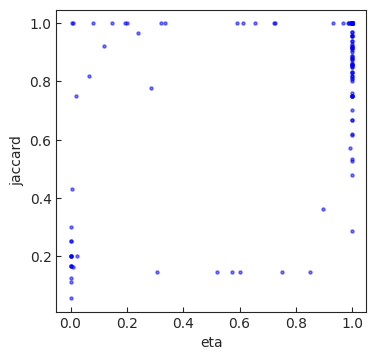

In [22]:
#txt_list = ['CD8-T_terminal-exhaustion','CD8-T_tumor-reactive-like_UP']


fig, ax = plt.subplots()
ax.scatter(markers["eta"],markers["jaccard"], s = 5, alpha = 0.5, c="blue")

#for txt in txt_list:
 #   ax.annotate(list(markers[markers['name']==txt]['name'])[0], (list(markers[markers['name']=='CD8-T_terminal-exhaustion']["eta"])[0], list(markers[markers['name']=='CD8-T_terminal-exhaustion']["jaccard"])[0]+np.random.randn()/30))
    
plt.xlabel("eta")
plt.ylabel("jaccard")
#plt.savefig("figures/eta_jacc.png", dpi = 300)
plt.show()

saved Figure to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Bassez_etajaccard_dot_imputed.svg


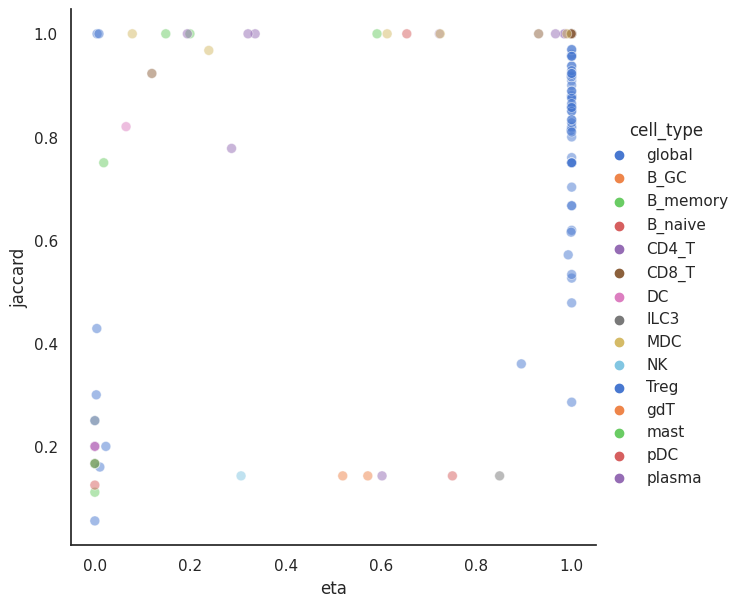

In [88]:
factor ='eta'
celltype = 'cell_type'
receptor ='jaccard'
df  = markers[['jaccard','eta','cell_type']]
save_name = 'Bassez_etajaccard_dot_imputed.svg'

sns.set_theme(style="white")

sns.relplot(x=factor, y=receptor, hue=celltype,
            sizes=(40, 400), alpha=0.5, palette='muted',data=df,
            height=6,s=50)
fig_save_path_complete = fig_save_path+save_name
plt.savefig(fig_save_path_complete,dpi=300)
print('saved Figure to:',fig_save_path_complete)

## compute overlap coefficient just using the gene sets from the respetive cell types 


In [83]:
#compute overlap coefficient just using the gene sets from the respetive cell types
overlap_df = pd.DataFrame()


for i in markers.index:
    set_a = set(markers.loc[i,0:49])
    celltype_a = markers.loc[i,'cell_type']
    input_df_global = input_df[input_df['gs.name'].isin(list(input_global_df['gs.name']))]
    input_specific_subset = list(input_specific_df[input_specific_df['c.name']==celltype_a]['gs.name'])
    input_df_specific = input_df[input_df['gs.name'].isin(input_specific_subset)]
    input_df_subset = pd.concat([input_df_specific,input_df_global])
    for j in set(input_df_subset['gs.name']):
        set_b = set(input_df_subset[input_df_subset['gs.name']==j]['g.name'])
        min_len = min([len(set_a),len(set_b)])
        intersect = set_a.intersection(set_b)
        overlap_coeff = len(intersect)/min_len
        overlap_df.loc[i,j] = overlap_coeff



/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [84]:
# create list with highest overlap and corresponding gene sets 
ls_name = []
ls_overlap = []

#loop through factors and find max overlapping gene set
for i in overlap_df.index:
    ls_name.append(overlap_df.T[i].sort_values(ascending=False).index[0])
    ls_overlap.append(overlap_df.T[i].sort_values(ascending=False)[0])
    
#add to dataframe

overlap_df['best_match_celltypespec'] = ls_name
overlap_df['overlap_celltypespec'] = ls_overlap

#add eta from markers df
overlap_df['eta'] = overlap_df.index.map(markers['eta'].to_dict())
overlap_df['cell_type'] = overlap_df.index.map(markers['cell_type'].to_dict())

In [86]:
markers['overlap_celltypespec'] = overlap_df['overlap_celltypespec']
markers['overlap_celltypespec']

0      1.000000
1      0.850000
2      1.000000
3      0.600000
4      1.000000
         ...   
192    0.857143
193    0.166667
194    1.000000
195    0.080000
196    0.125000
Name: overlap_celltypespec, Length: 197, dtype: float64

saved Figure to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Bassez_etaoverlap_cellspec_dot_imputed.svg


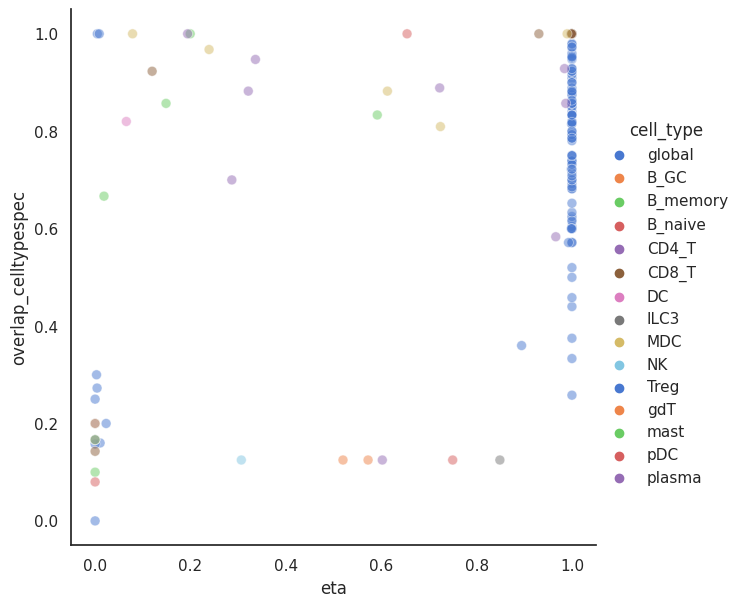

In [89]:
factor ='eta'
celltype = 'annotation_SPADE_1'
receptor ='overlap_celltypespec'
df  = overlap_df[['overlap_celltypespec','eta','cell_type']]
save_name = 'Bassez_etaoverlap_cellspec_dot_imputed.svg'

sns.set_theme(style="white")

sns.relplot(x='eta', y='overlap_celltypespec', hue='cell_type',
            sizes=(40, 400), alpha=.5, palette='muted',data=df,
            height=6,s=50)
fig_save_path_complete = fig_save_path+save_name
plt.savefig(fig_save_path_complete,dpi=300)
print('saved Figure to:',fig_save_path_complete)

In [90]:
save_path_complete = adata_save_path[:-5] + 'overlapcellspec.csv' 
overlap_df.to_csv(save_path_complete)
print('saved data to:',save_path_complete)

saved data to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembeddedoverlapcellspec.csv


saved to: Bassez_naive_lambda01._etahighlow_0.25.svg


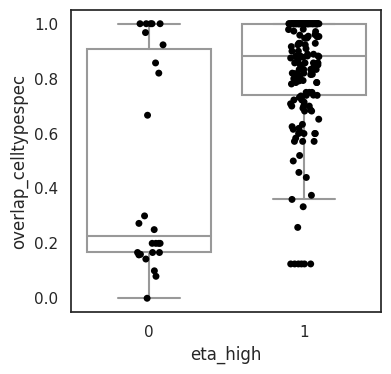

In [100]:
save_name = 'Bassez_naive_lambda01._etahighlow_0.25.svg'
sns.boxplot(data = markers,x = "eta_high", y = "overlap_celltypespec", color='#FFFFFF',fliersize=0)
sns.stripplot(data = markers,x = "eta_high", y = "overlap_celltypespec", color='#000000')
plt.savefig(fig_save_path+save_name)
print('saved to:',save_name)
plt.show()

## Name markers, compute metrics

In [44]:
markers["name"] = [markers.best_match[j] if markers.jaccard[j] > 0.25 else j for j in range(markers.shape[0])]

In [46]:
idx_matrix = np.argsort(factors,axis = 1)[:,::-1][:,:20]
a = corr_ind(idx_matrix,torch.Tensor(X))

/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


KeyboardInterrupt: 

In [ ]:
markers["corr"] = a

In [ ]:
""" 
for key in model.eta.keys():
    model.eta[key].data = model.eta[key].data +100*torch.diag(torch.ones(model.eta[key].shape[0])) 
"""

In [ ]:
markers

In [ ]:
sns.boxplot(data = markers, y = "corr", x = "eta_high")
plt.show()

In [ ]:
markers[markers.eta_high == 0]

## Visualize B matrix -- determines which pathways interact in the graph

In [ ]:
eta_global = (model.eta["global"]).exp()/(1.0 + (model.eta["global"]).exp())
eta_global = 0.5*(eta_global + eta_global.T)
eta_global = eta_global.detach().numpy()

In [ ]:
global_names = markers[markers.cell_type == "global"].name

In [ ]:
global_names2 = []
for name in global_names:
    if str(name)[:3] == "all":
        global_names2.append("_".join(name.split("_")[1:]))
    else:
        global_names2.append(name)

In [ ]:
eta_global = pd.DataFrame(eta_global, index = pd.Index(global_names2), columns = pd.Index(global_names2))

In [ ]:
cg = sns.clustermap(eta_global)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
#plt.savefig("figures/clustermap_graph.png", dpi = 300)


In [ ]:
def graph_network(model, ct, gs, gene_names_dict,id2word, word2id, thres = 0.65, N = 50):
    net = Network(height='750px', width='100%', bgcolor='#FFFFFF', font_color='black', notebook = True)
    net.barnes_hut()
    eta_global = (model.eta[ct]).exp()/(1.0 + (model.eta[ct]).exp())
    eta_global = 0.5*(eta_global + eta_global.T)
    theta_global = torch.softmax(model.theta[ct], dim = 1)
    mat = contract('il,lj,kj->ik',theta_global,eta_global,theta_global).detach().numpy()
    idxs = []
    for term in gene_names_dict[ct][gs]:
        idxs.append(word2id[term])
    ests = list(set(list(mat[idxs,:].sum(axis = 0).argsort()[::-1][:N]) + idxs))
    ests_names = []
    count = 0 
    for est in ests:
        ests_names.append(id2word[est])
        if est not in idxs:
            net.add_node(count, label = id2word[est], color = '#00ff1e')
        else:
            net.add_node(count, label = id2word[est], color = '#162347')
        count += 1
        
    inferred_mat = mat[ests,:][:,ests]
    for i in range(len(inferred_mat)):
        for j in range(i+1, len(inferred_mat)):
            if inferred_mat[i,j] > thres:
                net.add_edge(i, j)
    neighbor_map = net.get_adj_list()
    for node in net.nodes:
        node['value'] = len(neighbor_map[node['id']])

    return net


In [ ]:
#"TNK_PD-1_signaling"

a = graph_network(model = model, ct = "CD8_T", gs = 'CD8-T_tumor-reactive-like_UP', 
                  gene_names_dict = gene_names_dict,id2word=id2word, word2id=word2id, thres = 0.12, N = 80)

In [ ]:
a.show("a.html")

In [ ]:
gene_names_dict

In [ ]:
#create dictionary containing marker genes
markers_global = markers[markers['cell_type']=='global']

#concatenate factor number with name of overlapping gene set to make unique
a = list(markers_global.index.astype(str))
b = list(markers_global['name'].astype(str))

index_list = [x+'-X-'+ y for x,y in zip(a,b)]
markers_global.loc[:,'name'] = index_list

#create dict
markers_global = markers_global.set_index('name')
markers_global = markers_global.drop(columns=(['best_match', 'jaccard', 'cell_type', 'eta', 'eta_high', 'corr','cell_type']))
markers_dict_global_dict = markers_global.T.to_dict(orient='list')
markers_dict_global_dict

In [ ]:
#create dictionary containing marker genes (cell type specific factors)
markers_specific = markers[markers['cell_type']!='global']
#concatenate factor number with name of overlapping gene set to make unique
a = list(markers_specific.index.astype(str))
b = list(markers_specific['name'].astype(str))
index_list = [x+'-X-'+ y for x,y in zip(a,b)]
markers_specific.loc[:,'name'] = index_list
markers_specific = markers_specific.drop(columns=['best_match', 'jaccard', 'eta', 'eta_high', 'corr'])
#create dict
markers_specific = markers_specific.set_index('name')
markers_specific

In [ ]:
#df with updated factor names
markers_concat = pd.concat([markers_global, markers_specific])
markers_concat

In [ ]:
out.shape

In [ ]:
#create dataframe with cell loadings
loading_df = pd.DataFrame(out, index = adata.obs_names)


#add corresponding input gene set names

columns_list = list(markers['name'])
new_columns_list = list()

for i,v in enumerate(columns_list):
    a = str(i)+'-X-'+str(v)
    new_columns_list.append(a)

loading_df.columns = new_columns_list
loading_df

In [ ]:
out.shape

In [ ]:
list(markers_specific.index)

In [ ]:
#create multiindex
idx = pd.MultiIndex.from_tuples(list(zip(list(markers_specific.index),list(markers_specific['cell_type']))))
markers_specific.index = idx
markers_specific

In [ ]:
markers_specific

In [39]:
#list of cell type spec dictionaries
spec_dict_list = []
for i in set(markers_specific['cell_type']):
    markers_specific_subset = markers_specific[markers_specific['cell_type']==i]
    a = markers_specific_subset.drop(columns=['cell_type']).droplevel(level=1).T.to_dict(orient='list')
    spec_dict_list.append(a)
spec_dict_list

[{'153-X-B_Breg_UP': ['TGFB2',
   'EBI3',
   'TGFB1',
   'IL12A',
   'IL10',
   'HOPX',
   'CCR1',
   'DHRS9',
   'AC090152.1',
   'TESC',
   'FAS',
   'CXCR3',
   'FCRL4',
   'GLRX',
   'LINC02384',
   'GPR25',
   'ITGAX',
   'AC103702.2',
   'AICDA',
   'GBP1',
   'IL4I1',
   'GPR137B',
   'GCSAM',
   'YWHAH',
   'S100A8',
   'LMO2',
   'C12orf75',
   'CDKN2A',
   'EGR2',
   'RASL11A',
   'IFIT3',
   'WARS',
   'TOX',
   'STAT1',
   'PTTG1',
   'AP1S2',
   'NEK6',
   'ECHS1',
   'SERPINA9',
   'CCL22',
   'CD96',
   'NUGGC',
   'RGS13',
   'APOBEC3H',
   'CCND1',
   'ITGB2-AS1',
   'RAB13',
   'PRDX1',
   'OSTN-AS1',
   'SERPINB6'],
  '154-X-B_effector-2_UP': ['CSF2',
   'IL2',
   'IL13',
   'IL6',
   'IL10',
   'ALPL',
   'GNG11',
   'CD1C',
   'COL9A3',
   'TNFSF9',
   'NR4A1',
   'TENT5C',
   'IGHD',
   'GALNTL6',
   'CD72',
   'CLMN',
   'ITM2C',
   'C1orf162',
   'CHI3L2',
   'CD6',
   'LILRA4',
   'SLC38A11',
   'LINC02576',
   'RGS16',
   'CLIC3',
   'A4GALT',
   'ZCCHC18',
  

In [40]:
# dictionary of cell type specific dictionaries
cell_spec_dict = {}
for i,v in enumerate(set(markers_specific['cell_type'])):
    cell_spec_dict[v] = spec_dict_list[i]
cell_spec_dict

{'B_memory': {'153-X-B_Breg_UP': ['TGFB2',
   'EBI3',
   'TGFB1',
   'IL12A',
   'IL10',
   'HOPX',
   'CCR1',
   'DHRS9',
   'AC090152.1',
   'TESC',
   'FAS',
   'CXCR3',
   'FCRL4',
   'GLRX',
   'LINC02384',
   'GPR25',
   'ITGAX',
   'AC103702.2',
   'AICDA',
   'GBP1',
   'IL4I1',
   'GPR137B',
   'GCSAM',
   'YWHAH',
   'S100A8',
   'LMO2',
   'C12orf75',
   'CDKN2A',
   'EGR2',
   'RASL11A',
   'IFIT3',
   'WARS',
   'TOX',
   'STAT1',
   'PTTG1',
   'AP1S2',
   'NEK6',
   'ECHS1',
   'SERPINA9',
   'CCL22',
   'CD96',
   'NUGGC',
   'RGS13',
   'APOBEC3H',
   'CCND1',
   'ITGB2-AS1',
   'RAB13',
   'PRDX1',
   'OSTN-AS1',
   'SERPINB6'],
  '154-X-B_effector-2_UP': ['CSF2',
   'IL2',
   'IL13',
   'IL6',
   'IL10',
   'ALPL',
   'GNG11',
   'CD1C',
   'COL9A3',
   'TNFSF9',
   'NR4A1',
   'TENT5C',
   'IGHD',
   'GALNTL6',
   'CD72',
   'CLMN',
   'ITM2C',
   'C1orf162',
   'CHI3L2',
   'CD6',
   'LILRA4',
   'SLC38A11',
   'LINC02576',
   'RGS16',
   'CLIC3',
   'A4GALT',
   '

In [42]:
#add dict to adata
adata.uns['SPADE_markers_global'] = markers_dict_global_dict
adata.uns['SPADE_markers_specific'] = cell_spec_dict

In [45]:
#add loadings
for i in loading_df.columns:
    adata.obs[i] = loading_df[i]
    print('added',i,'to adata')

added 0-X-all_multidrug-resistance to adata
added 1-X-all_porphyrine-heme_metabolism to adata
added 2-X-all_TNF-via-NFkB_signaling to adata
added 3-X-all_glyoxylate-dicarboxylate_metabolism to adata
added 4-X-all_IL6-JAK-STAT3_signaling to adata
added 5-X-5 to adata
added 6-X-all_triacylglycerol_synthesis to adata
added 7-X-all_circadian-rhythm to adata
added 8-X-all_heparan-sulfate_degradation to adata
added 9-X-all_autophagy-of-mitochondria_regulation_positive to adata
added 10-X-all_type-II-ifn-response to adata
added 11-X-all_autophagy_regulation_positive to adata
added 12-X-all_DNA-demethylation to adata
added 13-X-all_TYR_metabolism to adata
added 14-X-all_autophagy-of-mitochondria to adata
added 15-X-all_autophagy-chaperone-mediated to adata
added 16-X-all_transmembrane-transport-golgi to adata
added 17-X-all_osmotic-stress-response to adata
added 18-X-all_o-glycan_synthesis to adata
added 19-X-all_transmembrane-transport-mitochondrial to adata
added 20-X-all_cytosolic-DNA-sensi

<ipython-input-45-9fe7273997ff>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[i] = loading_df[i]


## add markers offset 1

In [29]:
adata_path = DATA_DIR+ 'BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded.h5ad'
adata_save_path = DATA_DIR+ 'BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded.h5ad'

In [30]:
adata = sc.read(adata_path)
adata

Only considering the two last: ['.0_50PC_reembedded', '.h5ad'].
Only considering the two last: ['.0_50PC_reembedded', '.h5ad'].


AnnData object with n_obs × n_vars = 97863 × 19984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'cohort', 'total_molecules', 'ID', 'age_rounded_up', 'postmenopause', 'TNM_version', 'T_prefix', 'T', 'T_suffix', 'N_prefix', 'N', 'N_suffix', 'M_prefix', 'M', 'M_suffix', 'HER2', 'ER', 'PR', 'CTX', 'KI67_precent_range_prePD1', 'KI67_precent_range_postPD1', 'TCR_clonotype_expansion', 'Bassez_nCount_RNA', 'Bassez_nFeature_RNA', 'Bassez_patient_id', 'Bassez_timepoint', 'Bassez_expansion', 'Bassez_BC_type', 'Bassez_cellType', 'Bassez_cellSubType', 'n_genes', 'percent_mito', 'n_counts', 'doublets', 'major_subsets', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'pheno_var_k2

In [31]:
out,f = compute_thetas(model)
factors,names = return_factor_matrix(model, dim = 1)
lst = []
for i in range(len(f)):
    ct = f[i]
    scaled = factors[i,:]*(model.gene_scaling[ct].exp().detach()/(1.0 + model.gene_scaling[ct].exp().detach()) + model.delta).numpy()
    
    
    lst.append(scaled)
scaled = np.array(lst)
new_factors = scaled/(scaled.sum(axis = 0,keepdims =True) + 1.0)
new_markers = return_markers(new_factors, id2word, n_top_vals= 50) #alternative marker calls (adding scaled factors back in)
temp = matching(new_markers,gene_names_dict)
new_markers["best_match"] = temp[0]
new_markers["jaccard"] = temp[1]
new_markers["cell_type"] = f
new_markers["eta"] = B_diag(model)
new_markers["eta_high"] = (new_markers["eta"] > 0.5).astype(int)

In [37]:
new_markers["name"] = [new_markers.best_match[j] if new_markers.jaccard[j] > 0.25 else j for j in range(new_markers.shape[0])]

In [38]:
idx_matrix = np.argsort(factors,axis = 1)[:,::-1][:,:20]
a = corr_ind(idx_matrix,torch.Tensor(X))

/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [39]:
new_markers["corr"] = a

In [40]:
#create dictionary containing marker genes new method
new_markers_global = new_markers[new_markers['cell_type']=='global']

#concatenate factor number with name of overlapping gene set to make unique
a = list(new_markers_global.index.astype(str))
b = list(new_markers_global['name'].astype(str))

index_list = [x+'-X-'+ y for x,y in zip(a,b)]
new_markers_global.loc[:,'name'] = index_list

#create dict
new_markers_global = new_markers_global.set_index('name')
new_markers_global = new_markers_global#.drop(columns=(['best_match', 'jaccard', 'cell_type', 'eta', 'eta_high', 'corr','cell_type']))
new_markers_dict_global_dict = new_markers_global.T.to_dict(orient='list')
new_markers_dict_global_dict

/home/wallet/miniconda3/envs/2021_Peer_SPADE_pytorch_model/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


{'0-X-all_multidrug-resistance': ['ABCC1',
  'ABCC4',
  'HSD17B4',
  'LTC4S',
  'NSDHL',
  'ABCC3',
  'ABCB4',
  'DHCR24',
  'VPS4B',
  'HSD3B7',
  'NDUFS8',
  'GTF2H1',
  'TRIP4',
  'RDH11',
  'SLC27A2',
  'NUMA1',
  'CD44',
  'SAMSN1',
  'SLC23A2',
  'TOPORS',
  'JUNB',
  'MTAP',
  'NEMF',
  'UQCRFS1',
  'BCAP31',
  'CYB5B',
  'RAD23B',
  'TMEM129',
  'CEL',
  'UBE2G2',
  'SMAD2',
  'USO1',
  'HDAC10',
  'NDUFA1',
  'RNF187',
  'GAPDH',
  'RAE1',
  'DMTF1',
  'COMMD1',
  'SEC31A',
  'NOP56',
  'RNF34',
  'PRMT2',
  'CD74',
  'APPBP2',
  'PDK1',
  'M6PR',
  'NDUFV1',
  'BRF2',
  'ATP2A2',
  'all_multidrug-resistance',
  1.0,
  'global',
  1.0,
  1,
  0.6101764342894865],
 '1-X-all_porphyrine-heme_metabolism': ['HMOX2',
  'PPOX',
  'BLVRB',
  'ALAS1',
  'UROD',
  'BLVRA',
  'UROS',
  'FECH',
  'HMBS',
  'ALAD',
  'HCCS',
  'CYBRD1',
  'HMOX1',
  'FTH1',
  'CPOX',
  'ALAS2',
  'SLC46A1',
  'ISCU',
  'UBE2L6',
  'HINT1',
  'S100A11',
  'PRMT2',
  'DCXR',
  'NDUFS2',
  'CNBP',
  'ERP29',


In [41]:
#create dictionary containing marker genes (cell type specific factors) new method
new_markers_specific = new_markers[new_markers['cell_type']!='global']
#concatenate factor number with name of overlapping gene set to make unique
a = list(new_markers_specific.index.astype(str))
b = list(new_markers_specific['name'].astype(str))
index_list = [x+'-X-'+ y for x,y in zip(a,b)]
new_markers_specific.loc[:,'name'] = index_list
new_markers_specific = new_markers_specific#.drop(columns=['best_match', 'jaccard', 'eta', 'eta_high', 'corr'])
#create dict
new_markers_specific = new_markers_specific.set_index('name')
new_markers_specific

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,best_match,jaccard,cell_type,eta,eta_high,corr
name,,,,,,,,,,,,,,,,,,,,,
152-X-B_IgM-ligation_response,TYMS,UBE2C,RRM2,CXCL13,ASF1B,TK1,MAD2L1,CDCA3,CENPM,CDCA8,...,MS4A1,MCM7,CKS2,PSMA5,B_IgM-ligation_response,0.360000,B_GC,5.724588e-01,1,0.347416
153-X-all_type-II-ifn-response,MS4A1,CD79A,BANK1,TNFRSF13B,HLA-DQA1,CD19,AC104699.1,TEX9,HLA-DRA,HLA-DQB1,...,SPIB,BCAS4,LY86,TCF4,all_type-II-ifn-response,0.333333,B_memory,1.994729e-01,0,0.412811
154-X-154,CD79A,LINC01857,VPREB3,MS4A1,LINC00926,CD1C,FCRL2,CD19,CD83,CD69,...,KHDRBS2,PLD4,LTB,SMIM14,CD4-T_TFH_UP,0.250000,B_memory,5.917641e-01,1,0.389200
155-X-155,CD79A,LINC01781,MS4A1,BANK1,VPREB3,LINC00926,CD79B,TXNIP,RALGPS2,BLK,...,SYPL1,LARGE2,GNG7,FCMR,CD4-T_TH22_UP,0.166667,B_memory,1.861952e-02,0,0.391720
156-X-B_IgM-ligation_response,USP6NL,BTLA,CLIC4,ZBP1,CBX5,CKS1B,MCM3,GPR183,HELLS,CKAP2,...,CENPS,NCAPG,ROM1,BRIP1,B_IgM-ligation_response,1.000000,B_memory,1.000000e+00,1,0.350742
157-X-157,LINC01781,TNFRSF13B,TNFRSF13C,AL158850.1,CR2,CNR2,FCRL1,PAX5,TLR10,ZBTB32,...,BANK1,CLECL1,CHD7,CEPT1,CD4-T_TFH_UP,0.125000,B_memory,3.312186e-16,0,0.498413
158-X-all_type-II-ifn-response,FCER2,IGHD,FCRL1,LINC00926,LINC02397,FCRLA,VPREB3,HLA-DOB,BACH2,PAX5,...,RNASE6,FAM177B,AC025164.1,HVCN1,all_type-II-ifn-response,0.266667,B_naive,7.498826e-01,1,0.347416
159-X-159,CD40LG,IL7R,ANXA1,IL32,CD3D,S100A4,S100A11,LTB,FOS,S100A10,...,GPR174,AHNAK,ABRACL,THEM4,all_mitophagy_regulation_positive,0.181818,CD4_T,1.939868e-01,0,0.386818
160-X-TNK_IL2_response,TCF7,IL32,CD3D,CD7,PRDX2,LTB,SOCS3,LCK,CD27,PASK,...,PRIM1,TMEM204,PLAC8,ATP6V0E2,TNK_IL2_response,0.277778,CD4_T,3.362413e-01,0,0.550226


In [42]:
#df with updated factor names
new_markers_concat = pd.concat([new_markers_global, new_markers_specific])
new_markers_concat

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,best_match,jaccard,cell_type,eta,eta_high,corr
name,,,,,,,,,,,,,,,,,,,,,
0-X-all_multidrug-resistance,ABCC1,ABCC4,HSD17B4,LTC4S,NSDHL,ABCC3,ABCB4,DHCR24,VPS4B,HSD3B7,...,M6PR,NDUFV1,BRF2,ATP2A2,all_multidrug-resistance,1.000000,global,1.000000e+00,1,0.610176
1-X-all_porphyrine-heme_metabolism,HMOX2,PPOX,BLVRB,ALAS1,UROD,BLVRA,UROS,FECH,HMBS,ALAD,...,CTSC,SEC61A1,CORO1A,BLCAP,all_porphyrine-heme_metabolism,1.000000,global,1.000000e+00,1,0.418069
2-X-all_TNF-via-NFkB_signaling,FOSB,NR4A2,FOS,TNF,GADD45B,EGR1,IER2,DUSP1,JUNB,DUSP2,...,BTG3,TNIP2,BIRC3,ZBTB10,all_TNF-via-NFkB_signaling,0.960000,global,1.000000e+00,1,0.512590
3-X-all_glyoxylate-dicarboxylate_metabolism,GRHPR,GLO1,HAGHL,PARK7,PPA1,LDHA,EEF1A1,NHP2,APRT,FABP5,...,CHMP2A,RANBP1,LAMTOR2,PDAP1,all_glyoxylate-dicarboxylate_metabolism,1.000000,global,1.000000e+00,1,0.301661
4-X-all_IL6-JAK-STAT3_signaling,BAK1,PTPN2,IL17RA,PTPN1,MYD88,IL12RB1,TGFB1,CBL,IRF9,A2M,...,EBI3,MAP3K8,ACVR1B,CXCL9,all_IL6-JAK-STAT3_signaling,1.000000,global,1.000000e+00,1,0.403906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192-X-192,TPSAB1,TPSB2,CPA3,MS4A2,HPGDS,HPGD,GATA2,TPSD1,SLC18A2,CLU,...,CAVIN2,AC020916.1,EGR1,HSP90AB1,all_autophagy-chaperone-mediated,0.133333,mast,1.487619e-01,0,0.170647
193-X-193,TMEM233,GCSAML,HDC,AL157895.1,SVOPL,IL1RL1,TPSD1,SLC18A2,GATA2,MS4A2,...,P2RX1,PROCR,BACE2,MAST4,all_lipophagy,0.142857,mast,8.275377e-16,0,0.694404
194-X-194,PTGDS,LILRA4,GZMB,PLD4,IRF7,SERPINF1,CST3,JCHAIN,CLIC3,IL3RA,...,HERPUD1,RHEX,ZFP36,TPM2,CD4-T_TH22_UP,0.166667,pDC,6.542140e-01,1,0.136639


In [43]:
new_markers_concat.loc['182-X-182']

0                             SPP1
1                             MMP9
2                             CTSL
3                             CCL2
4                            APOC1
5                           RNASE1
6                            NUPR1
7                         C15orf48
8                            GPNMB
9                            CXCL8
10                             ADM
11                          SMIM25
12                            FBP1
13                           MMP19
14                         SLC11A1
15                         CYP27A1
16                           FABP4
17                           MARCO
18                           IL1RN
19                           HMOX1
20                          PLA2G7
21                           PLIN2
22                            MT1H
23                           FABP5
24                            CD36
25                           PLAUR
26                            SDC2
27                            MT1G
28                  

saved Figure to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Bassez_etajaccard_dot_imputed_new.svg


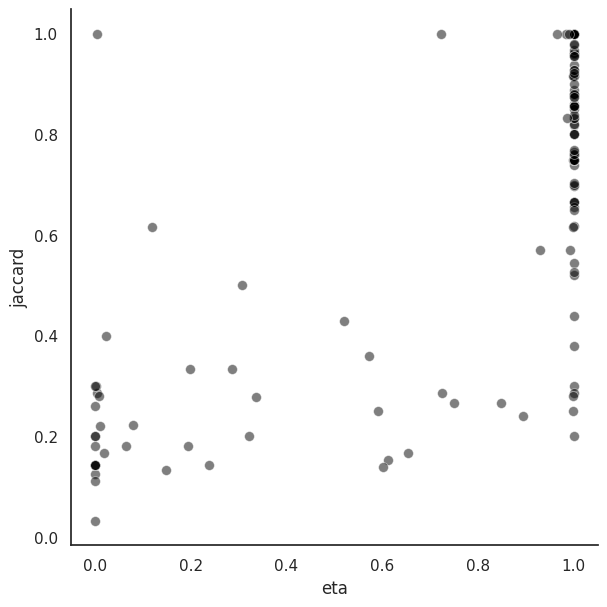

In [51]:
#plot overlap coefficient (here called jaccard but it's not the jaccard index) and eta for offset 1
factor ='eta'
celltype = 'cell_type'
receptor ='jaccard'
df  = new_markers_concat[['jaccard','eta','cell_type']]
save_name = 'Bassez_etajaccard_dot_imputed_new.svg'

sns.set_theme(style="white")

sns.relplot(x=factor, y=receptor,color='#000000', #hue=celltype,
            sizes=(40, 400), alpha=0.5, #palette=subtype_color_dict,
            data=df,
            height=6,s=50)
fig_save_path_complete = fig_save_path+save_name
plt.savefig(fig_save_path_complete,dpi=300)
print('saved Figure to:',fig_save_path_complete)

saved to: Bassez_naive_lambda01._etahighlow_0.25_new.svg


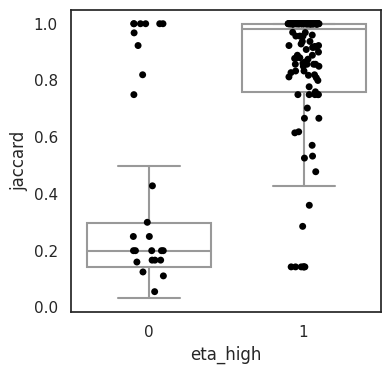

In [57]:
save_name = 'Bassez_naive_lambda01._etahighlow_0.25_new.svg'
sns.boxplot(data = new_markers_concat,x = "eta_high", y = "jaccard", color='#FFFFFF',fliersize=0)
sns.stripplot(data = markers,x = "eta_high", y = "jaccard", color='#000000')
plt.savefig(fig_save_path+save_name)
print('saved to:',save_name)
plt.show()

In [46]:
#list of cell type spec dictionaries
spec_dict_list = []
for i in set(new_markers_specific['cell_type']):
    new_markers_specific_subset = new_markers_specific[new_markers_specific['cell_type']==i]
    a = new_markers_specific_subset.drop(columns=['cell_type']).T.to_dict(orient='list')
    spec_dict_list.append(a)
spec_dict_list

[{'181-X-CD4-T_TH17_UP': ['TNFSF11',
   'LINC00299',
   'ST3GAL1',
   'SPINK2',
   'KIT',
   'FXYD7',
   'TCF7',
   'AL034397.3',
   'RORC',
   'LTA4H',
   'IL23R',
   'TMIGD2',
   'TIMP1',
   'XCL1',
   'IL18R1',
   'SOX4',
   'IL1R1',
   'PCDH9',
   'CAT',
   'SSBP2',
   'SATB1',
   'ANXA1',
   'TRDC',
   'XCL2',
   'GSN',
   'KRT86',
   'TNFSF4',
   'IL7R',
   'AREG',
   'HPN',
   'KLRB1',
   'TNFRSF4',
   'PTGDR',
   'C20orf204',
   'AQP3',
   'SPRY1',
   'RUNX2',
   'LST1',
   'RAB37',
   'TLE1',
   'SCML4',
   'SVIL',
   'SH2D1B',
   'TNFRSF18',
   'LTC4S',
   'IGFBP7',
   'SEC11A',
   'CTSW',
   'IL4I1',
   'CXXC5']},
 {'152-X-B_IgM-ligation_response': ['TYMS',
   'UBE2C',
   'RRM2',
   'CXCL13',
   'ASF1B',
   'TK1',
   'MAD2L1',
   'CDCA3',
   'CENPM',
   'CDCA8',
   'PTTG1',
   'HIST1H1B',
   'DUT',
   'ACY3',
   'CLSPN',
   'HMGB3',
   'SPC25',
   'BIK',
   'HMGB2',
   'CDK1',
   'FABP5',
   'CENPN',
   'TCL1A',
   'NCAPH',
   'VDAC1',
   'POU2AF1',
   'ZWINT',
   'STMN1',
 

In [47]:
# dictionary of cell type specific dictionaries
cell_spec_dict = {}
for i,v in enumerate(set(new_markers_specific['cell_type'])):
    cell_spec_dict[v] = spec_dict_list[i]
cell_spec_dict

{'ILC3': {'181-X-CD4-T_TH17_UP': ['TNFSF11',
   'LINC00299',
   'ST3GAL1',
   'SPINK2',
   'KIT',
   'FXYD7',
   'TCF7',
   'AL034397.3',
   'RORC',
   'LTA4H',
   'IL23R',
   'TMIGD2',
   'TIMP1',
   'XCL1',
   'IL18R1',
   'SOX4',
   'IL1R1',
   'PCDH9',
   'CAT',
   'SSBP2',
   'SATB1',
   'ANXA1',
   'TRDC',
   'XCL2',
   'GSN',
   'KRT86',
   'TNFSF4',
   'IL7R',
   'AREG',
   'HPN',
   'KLRB1',
   'TNFRSF4',
   'PTGDR',
   'C20orf204',
   'AQP3',
   'SPRY1',
   'RUNX2',
   'LST1',
   'RAB37',
   'TLE1',
   'SCML4',
   'SVIL',
   'SH2D1B',
   'TNFRSF18',
   'LTC4S',
   'IGFBP7',
   'SEC11A',
   'CTSW',
   'IL4I1',
   'CXXC5']},
 'B_GC': {'152-X-B_IgM-ligation_response': ['TYMS',
   'UBE2C',
   'RRM2',
   'CXCL13',
   'ASF1B',
   'TK1',
   'MAD2L1',
   'CDCA3',
   'CENPM',
   'CDCA8',
   'PTTG1',
   'HIST1H1B',
   'DUT',
   'ACY3',
   'CLSPN',
   'HMGB3',
   'SPC25',
   'BIK',
   'HMGB2',
   'CDK1',
   'FABP5',
   'CENPN',
   'TCL1A',
   'NCAPH',
   'VDAC1',
   'POU2AF1',
   'ZWINT

In [49]:
#add dict to adata
adata.uns['SPADE_markers_global_new'] = new_markers_dict_global_dict
adata.uns['SPADE_markers_specific_new'] = cell_spec_dict

In [35]:
adata.write(adata_save_path)
print('data saved to:',adata_save_path)

data saved to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded.h5ad


# add normalized factors

In [ ]:
#this normalization is now default behaviour in the stable Spectra github version

In [25]:
#paths
adata_path_SPECTRA = DATA_DIR + 'BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded.h5ad'
adata_save_path_SPECTRA =DATA_DIR +  'BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded.h5ad'

In [26]:
adata = sc.read(adata_path_SPECTRA)
print('read adata from:',adata_path_SPECTRA)

Only considering the two last: ['.0_50PC_reembedded', '.h5ad'].
Only considering the two last: ['.0_50PC_reembedded', '.h5ad'].
read adata from: /data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded.h5ad


In [27]:
#retrieve model info
out,f = compute_thetas(model)
factors,names = return_factor_matrix(model, dim = 1)
lst = []
for i in range(len(f)):
    ct = f[i]
    scaled = factors[i,:]*(model.gene_scaling[ct].exp().detach()/(1.0 + model.gene_scaling[ct].exp().detach()) + model.delta).numpy()
    
    
    lst.append(scaled)
scaled = np.array(lst)
new_factors = scaled/(scaled.sum(axis = 0,keepdims =True) + 1.0)
markers = return_markers(factors, id2word, n_top_vals= 50)
#markers = return_markers(new_factors, id2word, n_top_vals= 50) #alternative marker gene calls (add scaled factors back in)
temp = matching(markers,gene_names_dict)
markers["best_match"] = temp[0]
markers["jaccard"] = temp[1]
markers["cell_type"] = f
markers["eta"] = B_diag(model)
markers["eta_high"] = (markers["eta"] > 0.5).astype(int)

In [28]:
markers["name"] = [markers.best_match[j] if markers.jaccard[j] > 0.25 else j for j in range(markers.shape[0])]
markers

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,best_match,jaccard,cell_type,eta,eta_high,name
0,ABCC3,ABCC4,ABCC1,ABCB4,HSD17B4,LTC4S,NSDHL,DHCR24,HSD3B7,SLC27A2,...,NDUFV1,NOP56,PDK1,NUP205,all_multidrug-resistance,1.000000,global,1.000000e+00,1,all_multidrug-resistance
1,ALAS2,PPOX,CYBRD1,FECH,BLVRB,ALAS1,HMBS,CPOX,HMOX2,ALAD,...,CORO1A,RAP2B,UQCR11,BLCAP,all_porphyrine-heme_metabolism,1.000000,global,1.000000e+00,1,all_porphyrine-heme_metabolism
2,FOSB,NR4A1,NR4A3,F2RL1,SIK1,EGR1,PTX3,FOSL1,FJX1,NR4A2,...,NFKB2,REL,EHD1,DUSP4,all_TNF-via-NFkB_signaling,1.000000,global,1.000000e+00,1,all_TNF-via-NFkB_signaling
3,GLO1,HAGHL,GRHPR,HSPA8,HSP90AA1,TNIP1,PHB2,AP2S1,EEF1A1,CKS2,...,FAH,LDHB,MYC,PHLDA2,all_glyoxylate-dicarboxylate_metabolism,1.000000,global,1.000000e+00,1,all_glyoxylate-dicarboxylate_metabolism
4,IL17RA,PTPN1,REG1A,IL18R1,PTPN2,IL1R2,IL17RB,TNFRSF21,ACVRL1,LTBR,...,IRF9,PLA2G2A,IFNGR1,CD9,all_IL6-JAK-STAT3_signaling,1.000000,global,1.000000e+00,1,all_IL6-JAK-STAT3_signaling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,VAMP8,SNX4,BTK,VAMP7,SNAP23,LYN,HPGD,AC020916.1,GAPDH,ACTB,...,FCER1A,LDOC1,DNAJC27,S100A11,mast_granule-exocytosis,1.000000,mast,1.487619e-01,0,mast_granule-exocytosis
193,SLC35A1,RETREG2,EGFR,PIGP,HSPA4L,SPDEF,WWP2,PIK3CG,VPS13A,AC019197.1,...,SNX22,ALG1,EPHX2,PMCH,all_creatinine_metabolism,0.166667,mast,8.275377e-16,0,193
194,RNF145,HMGB2,OTULINL,ZAP70,TCF7,ID2,SGK1,RNF5,GZMB,JCHAIN,...,TMEM161B-AS1,GPR183,FBP1,TCL1A,p-DC_CpG-TLR9_response,1.000000,pDC,6.542140e-01,1,p-DC_CpG-TLR9_response
195,TNFRSF9,ASS1,ANKRD55,PLA2G4A,DCP1A,NABP1,AL590999.1,TES,S100A1,RGL4,...,SULT1A1,ATP6V1H,ARL4D,PODN,CD8-T_tumor-reactive-like_UP,0.125000,pDC,8.575408e-16,0,195


In [30]:
loading_df_norm = pd.DataFrame(cell_scores(out,factors), index = adata.obs_names)
loading_df_norm

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
JUQ105_GAGCAGAAGTGTTTGC-1,1.344286e-09,1.651804e-03,5.110240e-02,1.478003e-09,4.859614e-09,3.423534e-09,4.796172e-10,1.980944e-03,3.038378e-10,7.495611e-10,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ119_CGGACACTCAGGCCCA-1,1.013427e-09,5.411267e-10,3.943937e-02,1.536920e-01,3.619525e-08,4.316137e-09,7.613724e-10,6.480069e-09,2.815593e-10,3.935670e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ119_CGATTGACAGACAAGC-1,5.287444e-02,4.319911e-10,9.463341e-08,3.289882e-09,4.575619e-09,3.060317e-06,7.056520e-04,8.106389e-10,3.492849e-10,2.279715e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.032906,0.107045,0.0
JUQ042_CAGCAGCGTTACGTCA-1,2.283708e-09,1.540249e-09,3.765101e-02,3.181569e-01,5.600414e-04,2.244622e-07,9.932341e-04,1.165599e-03,9.088176e-04,1.140767e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ069_AGCGTCGCATCCCATC-1,3.098344e-10,4.225483e-10,1.187768e-02,3.145024e-08,2.024708e-08,5.602354e-09,9.196621e-04,1.324448e-03,3.113063e-10,1.182963e-02,...,0.144957,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JUQ033_CACCTTGCAGACGCTC-1,2.248729e-09,7.355435e-10,4.109891e-02,9.827225e-09,4.910249e-05,4.371260e-09,8.215583e-10,7.164070e-10,1.220880e-03,1.626125e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ042_CCATGTCAGAATAGGG-1,3.154652e-10,1.432627e-09,2.671960e-05,6.831801e-09,5.265536e-09,3.034075e-09,2.061268e-10,4.924770e-10,2.459847e-10,9.894188e-10,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ070_CCAATCCCAACTGCGC-1,1.330885e-09,1.007338e-09,2.816996e-02,5.765839e-09,7.927173e-08,5.298930e-02,9.946213e-10,1.558724e-03,5.190624e-10,1.313093e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ040_GACAGAGGTTCGGGCT-1,1.860558e-02,2.746902e-09,5.781922e-02,7.211265e-09,3.974631e-09,1.748911e-08,7.462194e-04,2.152908e-09,3.157242e-10,5.491248e-03,...,0.226236,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [19]:
#add corresponding input gene set names
columns_list = list(markers['name'])
new_columns_list = list()

for i,v in enumerate(columns_list):
    a = str(i)+'-X-'+str(v) +'-X-norm'
    new_columns_list.append(a)

loading_df_norm.columns = new_columns_list
loading_df_norm

,0-X-all_multidrug-resistance-X-norm,1-X-all_porphyrine-heme_metabolism-X-norm,2-X-all_TNF-via-NFkB_signaling-X-norm,3-X-all_glyoxylate-dicarboxylate_metabolism-X-norm,4-X-all_IL6-JAK-STAT3_signaling-X-norm,5-X-5-X-norm,6-X-all_triacylglycerol_synthesis-X-norm,7-X-all_circadian-rhythm-X-norm,8-X-all_heparan-sulfate_degradation-X-norm,9-X-all_autophagy-of-mitochondria_regulation_positive-X-norm,...,187-X-187-X-norm,188-X-188-X-norm,189-X-Treg_FoxP3-stabilization-X-norm,190-X-190-X-norm,191-X-191-X-norm,192-X-mast_granule-exocytosis-X-norm,193-X-193-X-norm,194-X-p-DC_CpG-TLR9_response-X-norm,195-X-195-X-norm,196-X-196-X-norm
JUQ024_AAACCTGCAACAACCT-1,1.344286e-09,1.651804e-03,5.110240e-02,1.478003e-09,4.859614e-09,3.423534e-09,4.796172e-10,1.980944e-03,3.038378e-10,7.495611e-10,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ024_AAACCTGCAAGAAGAG-1,1.013427e-09,5.411267e-10,3.943937e-02,1.536920e-01,3.619525e-08,4.316137e-09,7.613724e-10,6.480069e-09,2.815593e-10,3.935670e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ024_AAACCTGGTCTCCACT-1,5.287444e-02,4.319911e-10,9.463341e-08,3.289882e-09,4.575619e-09,3.060317e-06,7.056520e-04,8.106389e-10,3.492849e-10,2.279715e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.032906,0.107045,0.0
JUQ024_AAACCTGTCAACGAAA-1,2.283708e-09,1.540249e-09,3.765101e-02,3.181569e-01,5.600414e-04,2.244622e-07,9.932341e-04,1.165599e-03,9.088176e-04,1.140767e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ024_AAACGGGCACAGAGGT-1,3.098344e-10,4.225483e-10,1.187768e-02,3.145024e-08,2.024708e-08,5.602354e-09,9.196621e-04,1.324448e-03,3.113063e-10,1.182963e-02,...,0.144957,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JUQ124_TTCTCCTGTACCGTAT-1,2.248729e-09,7.355435e-10,4.109891e-02,9.827225e-09,4.910249e-05,4.371260e-09,8.215583e-10,7.164070e-10,1.220880e-03,1.626125e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ124_TTCTTAGTCACCATAG-1,3.154652e-10,1.432627e-09,2.671960e-05,6.831801e-09,5.265536e-09,3.034075e-09,2.061268e-10,4.924770e-10,2.459847e-10,9.894188e-10,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ124_TTTACTGCACCAGATT-1,1.330885e-09,1.007338e-09,2.816996e-02,5.765839e-09,7.927173e-08,5.298930e-02,9.946213e-10,1.558724e-03,5.190624e-10,1.313093e-02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
JUQ124_TTTACTGCACGGTGTC-1,1.860558e-02,2.746902e-09,5.781922e-02,7.211265e-09,3.974631e-09,1.748911e-08,7.462194e-04,2.152908e-09,3.157242e-10,5.491248e-03,...,0.226236,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [21]:
#add loadings
for i in loading_df_norm.columns:
    adata.obs[i] = loading_df_norm[i]
    print('added',i,'to adata')

added 0-X-all_multidrug-resistance-X-norm to adata
added 1-X-all_porphyrine-heme_metabolism-X-norm to adata
added 2-X-all_TNF-via-NFkB_signaling-X-norm to adata
added 3-X-all_glyoxylate-dicarboxylate_metabolism-X-norm to adata
added 4-X-all_IL6-JAK-STAT3_signaling-X-norm to adata
added 5-X-5-X-norm to adata
added 6-X-all_triacylglycerol_synthesis-X-norm to adata
added 7-X-all_circadian-rhythm-X-norm to adata
added 8-X-all_heparan-sulfate_degradation-X-norm to adata
added 9-X-all_autophagy-of-mitochondria_regulation_positive-X-norm to adata
added 10-X-all_type-II-ifn-response-X-norm to adata
added 11-X-all_autophagy_regulation_positive-X-norm to adata
added 12-X-all_DNA-demethylation-X-norm to adata
added 13-X-all_TYR_metabolism-X-norm to adata
added 14-X-all_autophagy-of-mitochondria-X-norm to adata
added 15-X-all_autophagy-chaperone-mediated-X-norm to adata
added 16-X-all_transmembrane-transport-golgi-X-norm to adata
added 17-X-all_osmotic-stress-response-X-norm to adata
added 18-X-al

<ipython-input-21-5c7eb41e68ec>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[i] = loading_df_norm[i]


In [24]:
adata.write(adata_save_path_SPECTRA)
print('saved adata to:',adata_save_path_SPECTRA)

saved adata to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded.h5ad
